# Computer Vision CSCI-GA.2272-001 Assignment 1, part 1.

Fall 2021 semester.

Due date: **September 30th 2021.**

## Introduction

This assignment is an introduction to using PyTorch for training simple neural net models. Two different datasets will be used: 
- MNIST digits [handwritten digits]
- CIFAR-10 [32x32 resolution color images of 10 object classes].

## Requirements

You should perform this assignment in PyTorch by modifying this ipython notebook (File-->Save a copy...).

To install PyTorch, follow instructions at http://pytorch.org/

Please submit your assignment by uploading this iPython notebook to Brightspace.

## Warmup [5%]

It is always good practice to visually inspect your data before trying to train a model, since it lets you check for problems and get a feel for the task at hand.

MNIST is a dataset of 70,000 grayscale hand-written digits (0 through 9).
60,000 of these are training images. 10,000 are a held out test set. 

CIFAR-10 is a dataset of 60,000 color images (32 by 32 resolution) across 10 classes
(airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck). 
The train/test split is 50k/10k.

Use `matplotlib` and ipython notebook's visualization capabilities to display some of these images.
[See this PyTorch tutorial page](http://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py) for hints on how to achieve this.

** Relevant Cell: "Data Loading" **

## Training a Single Layer Network on MNIST [10%]

Start by running the training on MNIST.
By default if you run this notebook successfully, it will train on MNIST.

This will initialize a single layer model train it on the 60,000 MNIST training images for 1 epoch (passes through the training data). 

The loss function [cross_entropy](http://pytorch.org/docs/master/nn.html?highlight=cross_entropy#torch.nn.functional.cross_entropy) computes a Logarithm of the Softmax on the output of the neural network, and then computes the negative log-likelihood w.r.t. the given `target`.

The default values for the learning rate, batch size and number of epochs are given in the "options" cell of this notebook. 
Unless otherwise specified, use the default values throughout this assignment. 

Note the decrease in training loss and corresponding decrease in validation errors.

Paste the output into your report.
(a): Add code to plot out the network weights as images (one for each output, of size 28 by 28) after the last epoch. Grab a screenshot of the figure and include it in your report. (Hint threads: [#1](https://discuss.pytorch.org/t/understanding-deep-network-visualize-weights/2060/2?u=smth) [#2](https://github.com/pytorch/vision#utils) )

(b): Reduce the number of training examples to just 50. [Hint: limit the iterator in the `train` function]. 
Paste the output into your report and explain what is happening to the model.

## Training a Multi-Layer Network on MNIST [10%]

- Add an extra layer to the network with 1000 hidden units and a `tanh` non-linearity. [Hint: modify the `Net` class]. Train the model for 10 epochs and save the output into your report.
-  Now set the learning rate to 10 and observe what happens during training. Save the output in your report and give a brief explanation

## Training a Convolutional Network on CIFAR [25%]

To change over to the CIFAR-10 dataset, change the `options` cell's `dataset` variable to `'cifar10'`.

- Create a convolutional network with the following architecture:
  - Convolution with 5 by 5 filters, 16 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling (non-overlapping).
  - Convolution with 5 by 5 filters, 128 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling (non-overlapping).
  - Flatten to vector.
  - Linear layer with 64 hidden units + Tanh nonlinearity.
  - Linear layer to 10 output units.

Train it for 20 epochs on the CIFAR-10 training set and copy the output
into your report, along with a image of the first layer filters.

Hints: [Follow the first PyTorch tutorial](http://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#sphx-glr-beginner-blitz-neural-networks-tutorial-py) or look at the [MNIST example](https://github.com/pytorch/examples/tree/master/mnist). Also, you may find training is faster if you use a GPU runtime (RunTime-->Change Runtime Type-->GPU). 

- Give a breakdown of the parameters within the above model, and the overall number.

In [1]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

In [2]:
# options
dataset = 'mnist' # options: 'mnist' | 'cifar10'
batch_size = 64   # input batch size for training
epochs = 10       # number of epochs to train
lr = 0.01        # learning rate

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to .
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


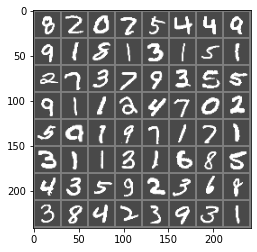

    8     2     0     7     5     4     4     9     9     1     8     1     3     1     5     1     2     7     3     7     9     3     5     5     9     1     1     2     4     7     0     2     5     4     1     9     7     1     7     1     3     1     1     3     1     6     8     5     4     3     5     9     2     3     6     8     3     8     4     2     3     9     3     1


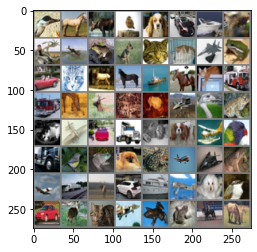

 bird horse  deer  bird   dog automobile  ship   cat  deer airplane  frog   dog   cat   cat airplane  frog automobile   cat  deer horse  ship horse   cat truck truck horse  deer  frog  frog airplane  bird  frog   cat airplane automobile truck   cat   dog airplane  bird truck  bird  frog   dog  frog airplane airplane  frog airplane truck  deer automobile  ship airplane   dog  bird automobile  deer   cat airplane  frog  frog horse horse


In [3]:
# Data Loading
# Warning: this cell might take some time when you run it for the first time, 
#          because it will download the datasets from the internet
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])
mnist_trainset = datasets.MNIST(root='.', train=True, download=True, transform=data_transform)
mnist_testset = datasets.MNIST(root='.', train=False, download=True, transform=data_transform)


data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])
cifar_trainset = datasets.CIFAR10(root='.', train=True, download=True, transform=data_transform)
cifar_testset = datasets.CIFAR10(root='.', train=False, download=True, transform=data_transform)

mnist_train_loader = torch.utils.data.DataLoader(mnist_trainset, batch_size=batch_size, shuffle=True, num_workers=0)
mnist_test_loader  = torch.utils.data.DataLoader(mnist_testset, batch_size=batch_size, shuffle=False, num_workers=0)

cifar_train_loader = torch.utils.data.DataLoader(cifar_trainset, batch_size=batch_size, shuffle=True, num_workers=0)
cifar_test_loader  = torch.utils.data.DataLoader(cifar_testset, batch_size=batch_size, shuffle=False, num_workers=0)
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torchvision.transforms as transforms
# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    img = img.numpy()
    plt.imshow(np.transpose(img, (1, 2, 0)))
    plt.show()

mnist_classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
def showData(train_loader, classes):
    # get some random training images
    dataiter = iter(train_loader)
    images, labels = dataiter.next()

    # show images
    imshow(torchvision.utils.make_grid(images))
    # print labels
    print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

showData(mnist_train_loader, mnist_classes)
showData(cifar_train_loader, cifar_classes)

**Training single layer network on MNIST**


In [4]:
## network and optimizer
def numInputs(dataset):
    if dataset == 'mnist':
        return 784
    elif dataset == 'cifar10':
        return 3072

num_inputs = numInputs('mnist')
num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net, self).__init__()
        self.linear = nn.Linear(num_inputs, num_outputs)

    def forward(self, input):
        input = input.view(-1, num_inputs)
        output = self.linear(input)
        return output

network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)

In [5]:
def train(epoch, train_loader):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test(test_loader):
    network.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        #data, target = Variable(data, volatile=True), Variable(target)
        output = network(data)
        test_loss += F.cross_entropy(output, target, reduction='sum').item() # sum up batch loss
        #test_loss += F.cross_entropy(output, target, sum=True).item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


In [ ]:
for epoch in range(0, epochs):
    train(epoch+1, mnist_train_loader)
    test(mnist_test_loader)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.383227
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.559186
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.497535
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.401437
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.505208
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.450029
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.399599
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.283466
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.379059
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.459570

Test set: Average loss: 0.3360, Accuracy: 9066/10000 (91%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.238360
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.203547
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.364132
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.416579
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.253898
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.234570
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.468689
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.321317
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.359529
T

**Network Weights plot**

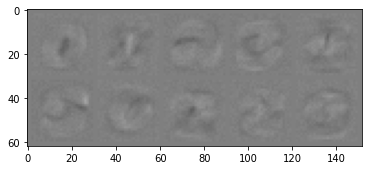

In [ ]:
def showNetworkWeights(network):
    network_weights = network.state_dict()['linear.weight']
    network_weights = network_weights.reshape(10,1,28,28)
    imshow(torchvision.utils.make_grid(network_weights, nrow=5).cpu())

showNetworkWeights(network)

**Training samples limited to 50**

In [ ]:
network50sampled = Net(num_inputs, num_outputs)

def train50Limited(epoch, train_loader):
    network50sampled.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data[:50]), Variable(target[:50])
        optimizer.zero_grad()
        output = network50sampled(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        break

def test50Limited(test_loader):
    network50sampled.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        #data, target = Variable(data, volatile=True), Variable(target)
        output = network50sampled(data)
        test_loss += F.cross_entropy(output, target, reduction='sum').item() # sum up batch loss
        #test_loss += F.cross_entropy(output, target, sum=True).item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

for epoch in range(0, epochs):
    train50Limited(epoch+1, mnist_train_loader)
    test50Limited(mnist_test_loader)


Test set: Average loss: 2.4418, Accuracy: 1127/10000 (11%)


Test set: Average loss: 2.4418, Accuracy: 1127/10000 (11%)


Test set: Average loss: 2.4418, Accuracy: 1127/10000 (11%)


Test set: Average loss: 2.4418, Accuracy: 1127/10000 (11%)


Test set: Average loss: 2.4418, Accuracy: 1127/10000 (11%)


Test set: Average loss: 2.4418, Accuracy: 1127/10000 (11%)


Test set: Average loss: 2.4418, Accuracy: 1127/10000 (11%)


Test set: Average loss: 2.4418, Accuracy: 1127/10000 (11%)


Test set: Average loss: 2.4418, Accuracy: 1127/10000 (11%)


Test set: Average loss: 2.4418, Accuracy: 1127/10000 (11%)



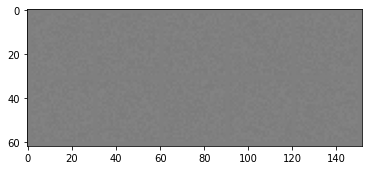

In [ ]:
showNetworkWeights(network50sampled)

**Whats happening in the case of only 50 sampled data?**
- The network is not able to learn the features properly obviously because of the smaller dataset of only 50 images 

### Training a Multi-Layer Network on MNIST
Add an extra layer to the network with 1000 hidden units and a tanh non-linearity. Train the model for 10 epochs and save the output into your report.



In [7]:
num_inputs = numInputs('mnist')
num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs

class MultiLayerNet(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(MultiLayerNet, self).__init__()
        self.linear1 = nn.Linear(num_inputs, 1000)
        self.linear2 = nn.Linear(1000, num_outputs)

    def forward(self, input):
        input = input.view(-1, num_inputs)
        output = self.linear1(input)
        output = nn.functional.tanh(output)
        output = self.linear2(output)
        return output

In [ ]:
multi_layer_network = MultiLayerNet(num_inputs, num_outputs)
multi_layer_optimizer = optim.SGD(multi_layer_network.parameters(), lr=lr)

def trainMultiLayerNet(epoch):
    multi_layer_network.train()
    for batch_idx, (data, target) in enumerate(mnist_train_loader):
        data, target = Variable(data), Variable(target)
        multi_layer_optimizer.zero_grad()
        output = multi_layer_network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        multi_layer_optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(mnist_train_loader.dataset),
                100. * batch_idx / len(mnist_train_loader), loss.item()))

def testMultiLayerNet():
    multi_layer_network.eval()
    test_loss = 0
    correct = 0
    for data, target in mnist_test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = multi_layer_network(data)
        test_loss += F.cross_entropy(output, target, size_average=False).item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(mnist_test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(mnist_test_loader.dataset),
        100. * correct / len(mnist_test_loader.dataset)))

for epoch in range(0, epochs):
    trainMultiLayerNet(epoch+1)
    testMultiLayerNet()

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.341270
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.809683
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.593815
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.587431
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.459807
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.346150
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.361795
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.379242
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.330451
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.256455


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Average loss: 0.3241, Accuracy: 9091/10000 (91%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.320298
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.290498
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.549164
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.176949
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.336626
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.185846
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.366884
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.411287
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.334183
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.407774

Test set: Average loss: 0.2813, Accuracy: 9205/10000 (92%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.287119
Train Epoch: 3 [6400/60000 (11%)]	Loss: 0.311130
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.283387
Train Epoch: 3 [19200/60000 (32%)]	Loss: 0.217131
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.449332
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.147735
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.294079
Train Epoch: 3 [44800/60000 (75%)]	Loss:

Now set the learning rate to 10 and observe what happens during training. Save the output in your report and give a brief explanation

In [8]:
num_inputs = numInputs('mnist')
num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs

multi_layer_network_lr10 = MultiLayerNet(num_inputs, num_outputs)
multi_layer_optimizer_lr10 = optim.SGD(multi_layer_network_lr10.parameters(), lr=10)

def trainMultiLayerNetLR10(epoch):
    multi_layer_network_lr10.train()
    for batch_idx, (data, target) in enumerate(mnist_train_loader):
        data, target = Variable(data), Variable(target)
        multi_layer_optimizer_lr10.zero_grad()
        output = multi_layer_network_lr10(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        multi_layer_optimizer_lr10.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(mnist_train_loader.dataset),
                100. * batch_idx / len(mnist_train_loader), loss.item()))

def testMultiLayerNetLR10():
    multi_layer_network_lr10.eval()
    test_loss = 0
    correct = 0
    for data, target in mnist_test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = multi_layer_network_lr10(data)
        test_loss += F.cross_entropy(output, target, size_average=False).item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(mnist_test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(mnist_test_loader.dataset),
        100. * correct / len(mnist_test_loader.dataset)))

for epoch in range(0, epochs):
    trainMultiLayerNetLR10(epoch+1)
    testMultiLayerNetLR10()

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.405401
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1408.620361
Train Epoch: 1 [12800/60000 (21%)]	Loss: 293.225952
Train Epoch: 1 [19200/60000 (32%)]	Loss: 326.624390
Train Epoch: 1 [25600/60000 (43%)]	Loss: 221.810760
Train Epoch: 1 [32000/60000 (53%)]	Loss: 1239.216675
Train Epoch: 1 [38400/60000 (64%)]	Loss: 710.632629
Train Epoch: 1 [44800/60000 (75%)]	Loss: 195.938538
Train Epoch: 1 [51200/60000 (85%)]	Loss: 247.541077
Train Epoch: 1 [57600/60000 (96%)]	Loss: 163.765320


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Average loss: 230.5540, Accuracy: 6158/10000 (62%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 153.866669
Train Epoch: 2 [6400/60000 (11%)]	Loss: 159.622131
Train Epoch: 2 [12800/60000 (21%)]	Loss: 272.900330
Train Epoch: 2 [19200/60000 (32%)]	Loss: 280.197632
Train Epoch: 2 [25600/60000 (43%)]	Loss: 326.832031
Train Epoch: 2 [32000/60000 (53%)]	Loss: 183.270248
Train Epoch: 2 [38400/60000 (64%)]	Loss: 424.519775
Train Epoch: 2 [44800/60000 (75%)]	Loss: 407.435455
Train Epoch: 2 [51200/60000 (85%)]	Loss: 128.469070
Train Epoch: 2 [57600/60000 (96%)]	Loss: 152.005386

Test set: Average loss: 110.0001, Accuracy: 7305/10000 (73%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 118.554756
Train Epoch: 3 [6400/60000 (11%)]	Loss: 220.340790
Train Epoch: 3 [12800/60000 (21%)]	Loss: 170.832687
Train Epoch: 3 [19200/60000 (32%)]	Loss: 286.183899
Train Epoch: 3 [25600/60000 (43%)]	Loss: 103.080109
Train Epoch: 3 [32000/60000 (53%)]	Loss: 324.099182
Train Epoch: 3 [38400/60000 (64%)]	Loss: 157.286041
Tr

**What happened when we increased the learning rate to 10 and kept the model architecture same?**
- The model finds it difficult to converge and find the minima. Gradient descent algorithm takes big movements and mostly oscillates around the minima.



## Training a Convolutional Network on CIFAR [25%]

Train it for 20 epochs on the CIFAR-10 training set and copy the output
into your report, along with a image of the first layer filters.

In [11]:
batch_size = 32
epochs = 20
lr = 0.01 # tried learning rate == 0.001, very slow learning

num_inputs = numInputs('cifar10')
num_outputs = 10

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=5, padding = 0)
        self.conv2 = nn.Conv2d(16, 128, kernel_size=5, padding = 0)
        self.fc1 = nn.Linear(128*5*5, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.max_pool2d(F.tanh(self.conv1(x)), (2, 2), stride=2)
        x = F.max_pool2d(F.tanh(self.conv2(x)), (2, 2), stride=2)
        x = x.view(-1, 3200)
        x = F.tanh(self.fc1(x))
        x = self.fc2(x)
        return x

conv_network_cifar = ConvNet()
conv_optimizer_cifar = optim.SGD(conv_network_cifar.parameters(), lr=lr, weight_decay=1e-2)

def trainConvCIFAR(epoch):
    conv_network_cifar.train()
    for batch_idx, (data, target) in enumerate(cifar_train_loader):
        data, target = Variable(data), Variable(target)
        conv_optimizer_cifar.zero_grad()
        output = conv_network_cifar(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        conv_optimizer_cifar.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(cifar_train_loader.dataset),
                100. * batch_idx / len(cifar_train_loader), loss.item()))

def testConvCIFAR():
    conv_network_cifar.eval()
    test_loss = 0
    correct = 0
    for data, target in cifar_test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = conv_network_cifar(data)
        test_loss += F.cross_entropy(output, target, size_average=False).item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(cifar_test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(cifar_test_loader.dataset),
        100. * correct / len(cifar_test_loader.dataset)))

for epoch in range(0, epochs):
    trainConvCIFAR(epoch+1)
    testConvCIFAR()

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Train Epoch: 1 [0/50000 (0%)]	Loss: 2.302004
Train Epoch: 1 [6400/50000 (13%)]	Loss: 2.110731
Train Epoch: 1 [12800/50000 (26%)]	Loss: 2.005438
Train Epoch: 1 [19200/50000 (38%)]	Loss: 2.042449
Train Epoch: 1 [25600/50000 (51%)]	Loss: 1.877310
Train Epoch: 1 [32000/50000 (64%)]	Loss: 1.987216
Train Epoch: 1 [38400/50000 (77%)]	Loss: 1.875781
Train Epoch: 1 [44800/50000 (90%)]	Loss: 1.729434


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Average loss: 1.8272, Accuracy: 3638/10000 (36%)

Train Epoch: 2 [0/50000 (0%)]	Loss: 1.780938
Train Epoch: 2 [6400/50000 (13%)]	Loss: 1.866461
Train Epoch: 2 [12800/50000 (26%)]	Loss: 1.818154
Train Epoch: 2 [19200/50000 (38%)]	Loss: 1.649580
Train Epoch: 2 [25600/50000 (51%)]	Loss: 1.637630
Train Epoch: 2 [32000/50000 (64%)]	Loss: 1.703479
Train Epoch: 2 [38400/50000 (77%)]	Loss: 1.698322
Train Epoch: 2 [44800/50000 (90%)]	Loss: 1.707614

Test set: Average loss: 1.6243, Accuracy: 4285/10000 (43%)

Train Epoch: 3 [0/50000 (0%)]	Loss: 1.703088
Train Epoch: 3 [6400/50000 (13%)]	Loss: 1.560167
Train Epoch: 3 [12800/50000 (26%)]	Loss: 1.514452
Train Epoch: 3 [19200/50000 (38%)]	Loss: 1.702404
Train Epoch: 3 [25600/50000 (51%)]	Loss: 1.472229
Train Epoch: 3 [32000/50000 (64%)]	Loss: 1.645157
Train Epoch: 3 [38400/50000 (77%)]	Loss: 1.505014
Train Epoch: 3 [44800/50000 (90%)]	Loss: 1.512089

Test set: Average loss: 1.5686, Accuracy: 4397/10000 (44%)

Train Epoch: 4 [0/50000 (0%)]

First layer filters of ConvNet on CIFAR

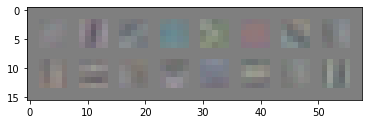

In [12]:
def showFirstLayerFilter(network):
    conv1_weights = network.conv1.weight.data
    imshow(torchvision.utils.make_grid(conv1_weights).cpu())

showFirstLayerFilter(conv_network_cifar)